In [4]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline


In [5]:
df = pd.read_csv('data/sleep_cycle_productivity.csv')
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [8]:
print(df.columns)

Index(['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time',
       'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality',
       'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level'],
      dtype='object')


In [10]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

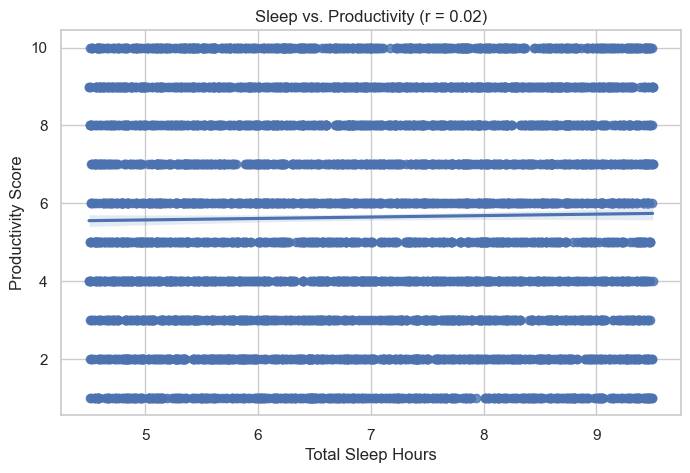

In [12]:
#Sleep vs. productivity
plt.figure()
sns.regplot(x="Total Sleep Hours", y="Productivity Score", data=df)
corr1, _ = pearsonr(df["Total Sleep Hours"], df["Productivity Score"])
plt.title(f"Sleep vs. Productivity (r = {corr1:.2f})")
plt.xlabel("Total Sleep Hours")
plt.ylabel("Productivity Score")
plt.show()

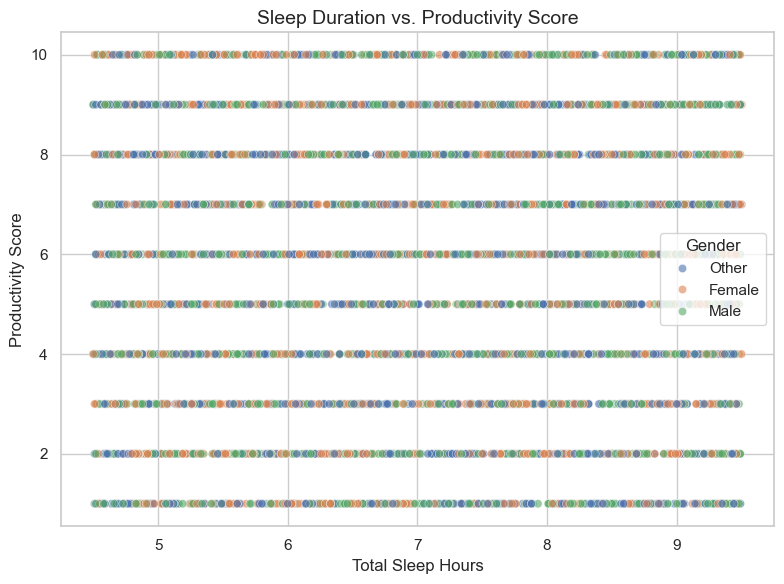

In [36]:
# Set the seaborn plot style
sns.set(style="whitegrid")

# Plot: Total Sleep Hours vs. Productivity Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Total Sleep Hours",
    y="Productivity Score",
    hue="Gender",
    alpha=0.6
)

# Customize labels and title
plt.title("Sleep Duration vs. Productivity Score", fontsize=14)
plt.xlabel("Total Sleep Hours", fontsize=12)
plt.ylabel("Productivity Score", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/8r/hqck9qgn2074tzrg697c6nz80000gn/T/ipykernel_65535/1848656764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


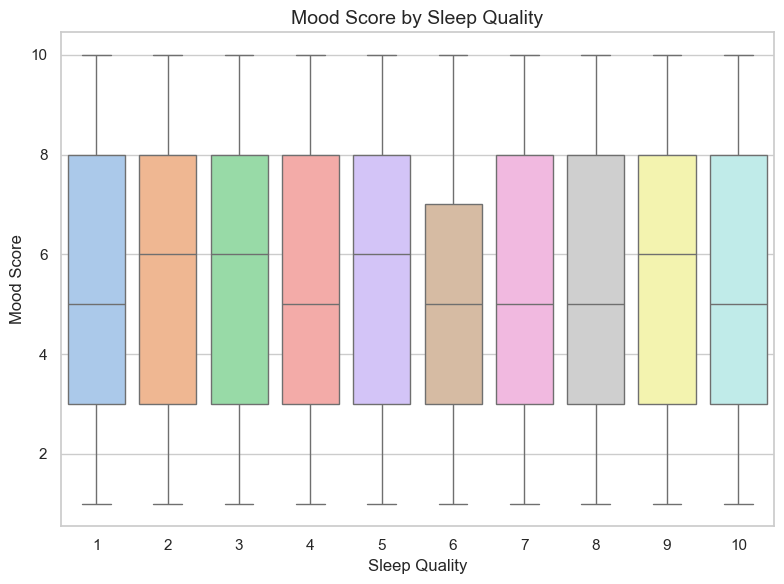

In [14]:
#sleep quality & mood 
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="Sleep Quality",
    y="Mood Score",
    data=df,
    palette="pastel"  # You can change this to 'coolwarm', 'Set2', 'pastel', etc.
)


plt.title("Mood Score by Sleep Quality", fontsize=14)
plt.xlabel("Sleep Quality", fontsize=12)
plt.ylabel("Mood Score", fontsize=12)
plt.tight_layout()
plt.show()

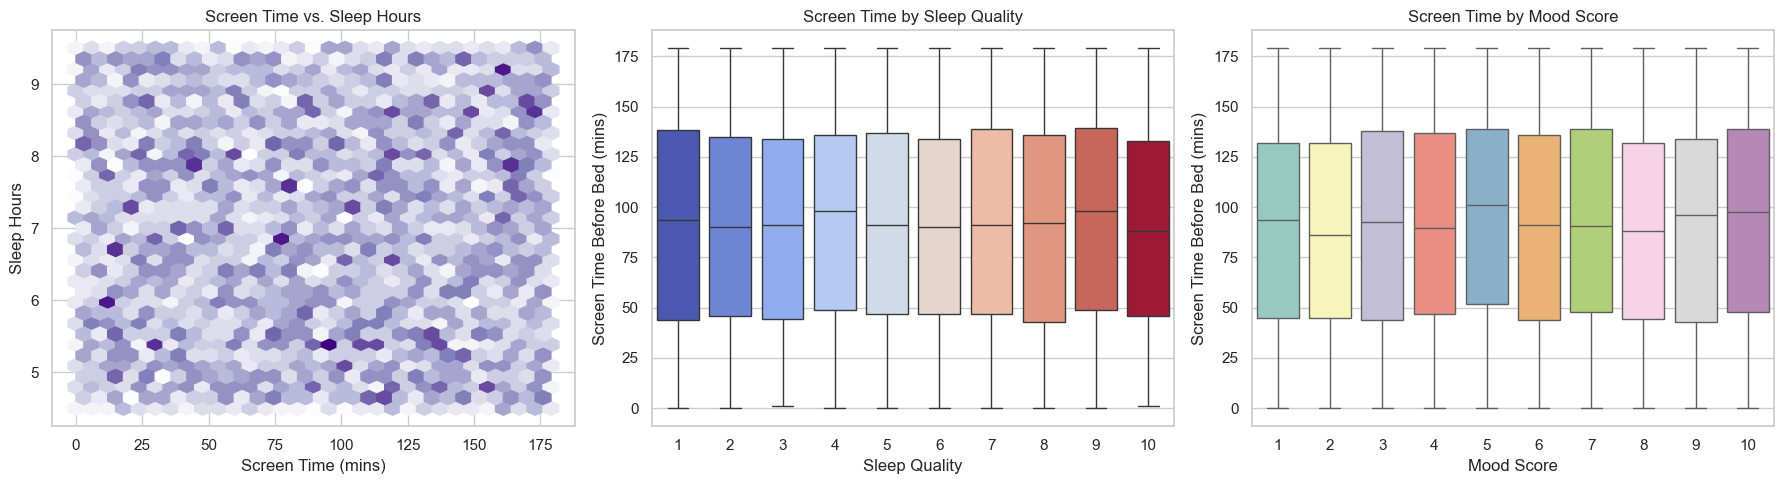

In [16]:
# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Hexbin for Screen Time vs. Sleep Hours
axs[0].hexbin(df["Screen Time Before Bed (mins)"], df["Total Sleep Hours"],
              gridsize=30, cmap='Purples')
axs[0].set_title("Screen Time vs. Sleep Hours")
axs[0].set_xlabel("Screen Time (mins)")
axs[0].set_ylabel("Sleep Hours")

# Plot 2: Boxplot for Sleep Quality
sns.boxplot(ax=axs[1],
            x="Sleep Quality",
            y="Screen Time Before Bed (mins)",
            hue="Sleep Quality",  # Assign hue same as x
            data=df,
            palette="coolwarm",
            legend=False)         # Hide redundant legend
axs[1].set_title("Screen Time by Sleep Quality")

# Plot 3: Boxplot for Mood Score
sns.boxplot(ax=axs[2],
            x="Mood Score",
            y="Screen Time Before Bed (mins)",
            hue="Mood Score",     # Assign hue same as x
            data=df,
            palette="Set3",
            legend=False)         # Hide redundant legend
axs[2].set_title("Screen Time by Mood Score")

plt.tight_layout()
plt.show()

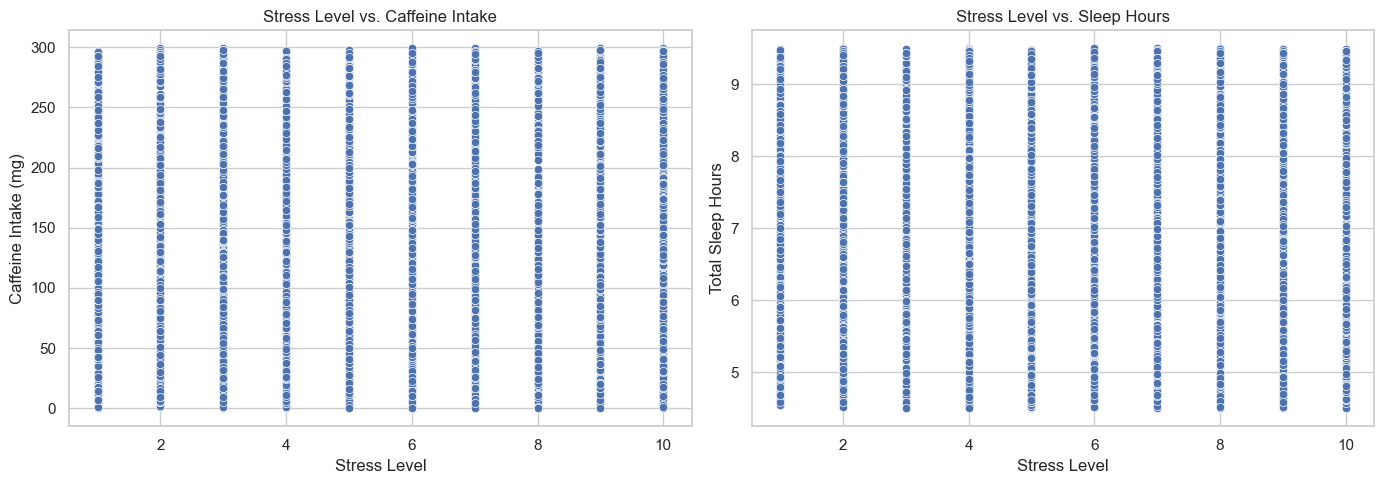

In [18]:
#stress Level vs. Sleep & Caffeine

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x="Stress Level", y="Caffeine Intake (mg)", data=df, ax=axs[0])
axs[0].set_title("Stress Level vs. Caffeine Intake")

sns.scatterplot(x="Stress Level", y="Total Sleep Hours", data=df, ax=axs[1])
axs[1].set_title("Stress Level vs. Sleep Hours")

plt.tight_layout()
plt.show()

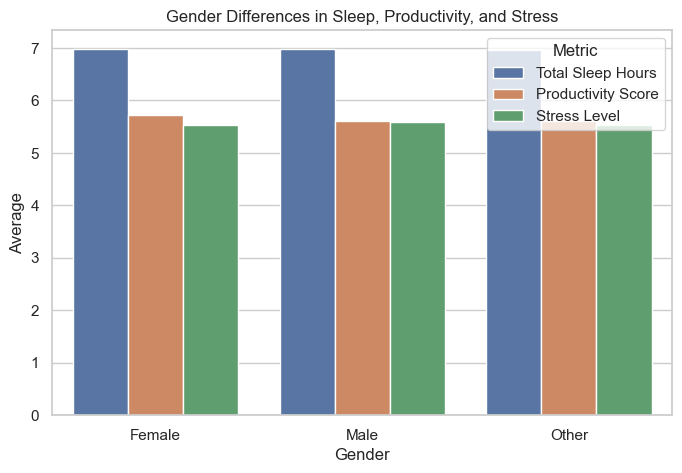

In [20]:
gender_means = df.groupby("Gender")[["Total Sleep Hours", "Productivity Score", "Stress Level"]].mean().reset_index()
gender_means_melted = gender_means.melt(id_vars="Gender", var_name="Metric", value_name="Average")

plt.figure()
sns.barplot(x="Gender", y="Average", hue="Metric", data=gender_means_melted)
plt.title("Gender Differences in Sleep, Productivity, and Stress")
plt.ylabel("Average")
plt.show()

Correlation between Work Hours and Productivity Score: -0.02


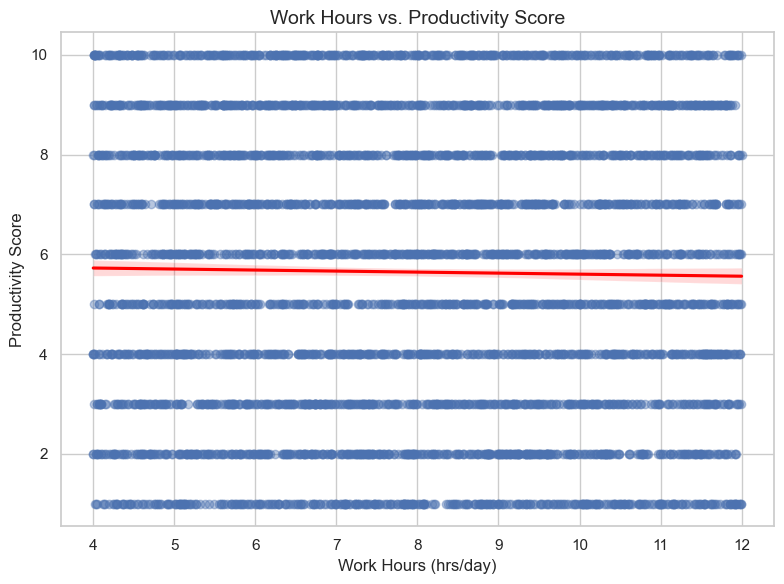

In [22]:
#Work Hours vs. Productivity Score (Scatter + Trendline)

# Optional: Clean column names
df.columns = df.columns.str.strip()

# Plot: Work Hours vs. Productivity Score with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x="Work Hours (hrs/day)",
    y="Productivity Score",
    scatter_kws={'alpha': 0.4},  # transparent dots
    line_kws={'color': 'red'},   # regression line
)

# Customize plot
plt.title("Work Hours vs. Productivity Score", fontsize=14)
plt.xlabel("Work Hours (hrs/day)", fontsize=12)
plt.ylabel("Productivity Score", fontsize=12)
plt.tight_layout()

correlation = df["Work Hours (hrs/day)"].corr(df["Productivity Score"])
print(f"Correlation between Work Hours and Productivity Score: {correlation:.2f}")

# Show the plot
plt.show()

Real Model R²: 0.00021708917573548536
Noise Model R²: 0.0017662720903341977
Original Correlation: -0.007
Noisy Correlation: -0.009
Real Correlation: -0.007091984647878771


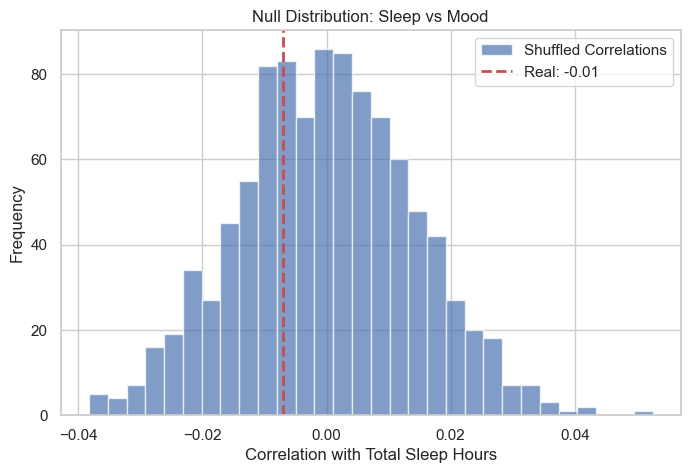

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data (replace with your real data)
data = pd.read_csv('data/sleep_cycle_productivity.csv')

# =======================
# 1️⃣ Predictive Model Benchmark: Real vs. Noise
# =======================

# Real features
X_real = data[['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)']]
y = data['Mood Score']

model_real = LinearRegression().fit(X_real, y)
y_pred_real = model_real.predict(X_real)

print("Real Model R²:", r2_score(y, y_pred_real))

# Random Noise features
X_noise = pd.DataFrame({
    'Noise1': np.random.normal(0, 1, len(data)),
    'Noise2': np.random.normal(0, 1, len(data)),
    'Noise3': np.random.normal(0, 1, len(data))
})

model_noise = LinearRegression().fit(X_noise, y)
y_pred_noise = model_noise.predict(X_noise)

print("Noise Model R²:", r2_score(y, y_pred_noise))

# =======================
# 2️⃣ Add Controlled Noise for Robustness
# =======================

# Adding small Gaussian noise to 'Total Sleep Hours'
data['Sleep Hours Noisy'] = data['Total Sleep Hours'] + np.random.normal(0, 0.1, len(data))

# Compare correlation before and after noise
original_corr = data['Total Sleep Hours'].corr(data['Mood Score'])
noisy_corr = data['Sleep Hours Noisy'].corr(data['Mood Score'])

print(f"Original Correlation: {original_corr:.3f}")
print(f"Noisy Correlation: {noisy_corr:.3f}")

# =======================
# 3️⃣ Null Distribution via Shuffling
# =======================

# Real correlation
real_corr = data['Total Sleep Hours'].corr(data['Mood Score'])
print("Real Correlation:", real_corr)

# Shuffled correlations
shuffled_corrs = []
for _ in range(1000):
    shuffled = data['Mood Score'].sample(frac=1).reset_index(drop=True)
    shuffled_corrs.append(data['Total Sleep Hours'].corr(shuffled))

# Plot
plt.hist(shuffled_corrs, bins=30, alpha=0.7, label='Shuffled Correlations')
plt.axvline(real_corr, color='r', linestyle='dashed', linewidth=2, label=f"Real: {real_corr:.2f}")
plt.legend()
plt.xlabel('Correlation with Total Sleep Hours')
plt.ylabel('Frequency')
plt.title('Null Distribution: Sleep vs Mood')
plt.show()

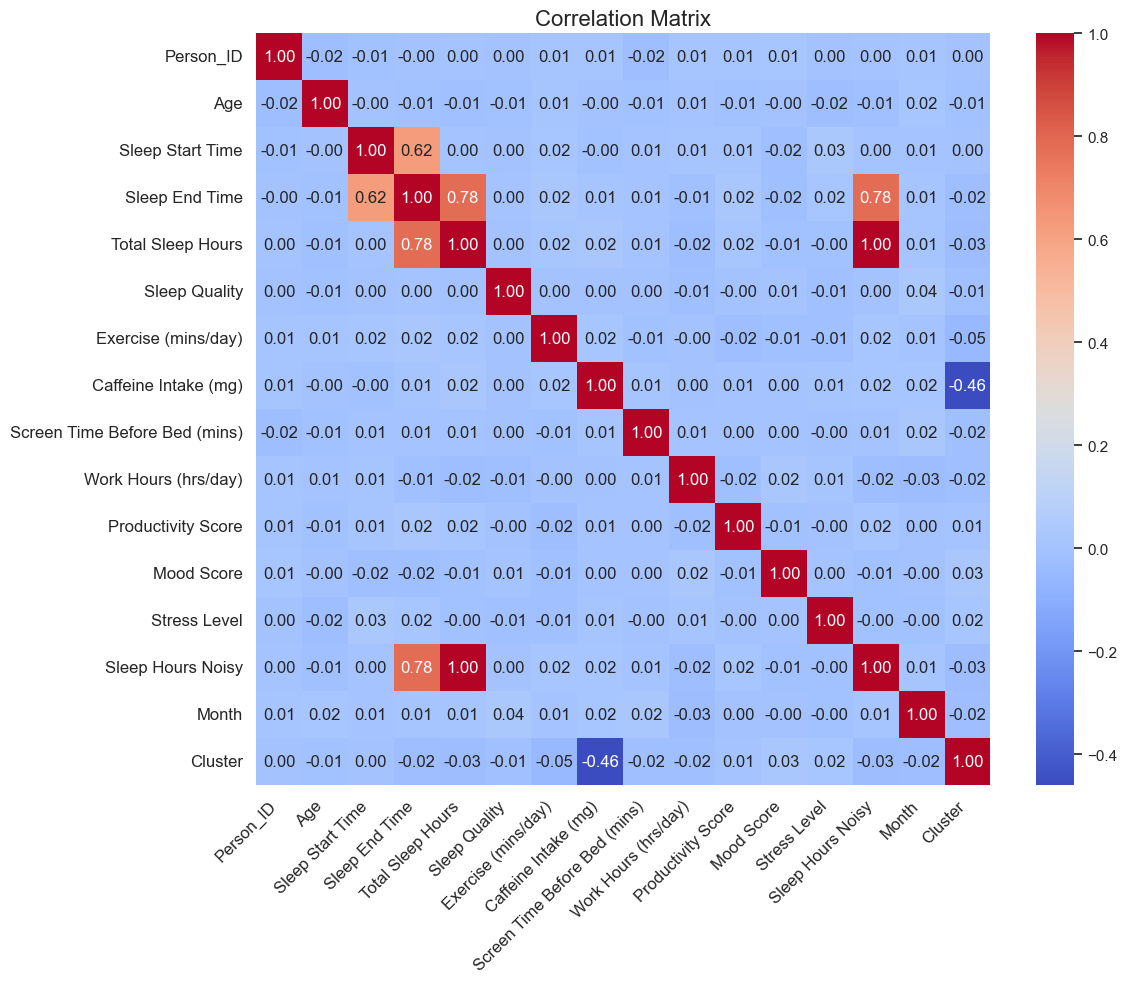

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=True)

# Create the heatmap with larger font size for annotations and adjusted labels
plt.figure(figsize=(12,10))  # Increase figure size for better readability
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})  # Set annotation font size
plt.title('Correlation Matrix', fontsize=16)  # Increase title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)  # Set y-axis label size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

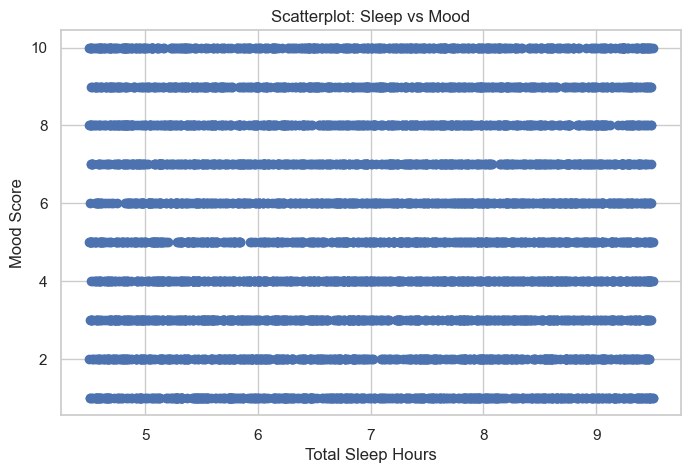

       Total Sleep Hours   Mood Score
count        5000.000000  5000.000000
mean            6.974902     5.370600
std             1.454033     2.835783
min             4.500000     1.000000
25%             5.690000     3.000000
50%             6.960000     5.000000
75%             8.210000     8.000000
max             9.500000    10.000000


In [30]:
import matplotlib.pyplot as plt

# Example: Total Sleep Hours vs Mood Score
plt.scatter(data['Total Sleep Hours'], data['Mood Score'])
plt.xlabel('Total Sleep Hours')
plt.ylabel('Mood Score')
plt.title('Scatterplot: Sleep vs Mood')
plt.show()

# Check for extreme values
print(data[['Total Sleep Hours', 'Mood Score']].describe())

Sleep Hours:

Most people sleep between 5.7 hours and 8.2 hours. The average sleep is slightly under 7 hours, which is considered a bit less than the recommended 7-9 hours per night for adults.

The variability is moderate, with a 1.45-hour standard deviation indicating that some people sleep significantly more or less than the average.

Mood Scores:

Mood scores are more spread out, with a standard deviation of 2.84. The average mood is just above 5 (on a 1–10 scale), indicating that people in this dataset generally report being in a slightly below-average mood.

Mood scores are heavily spread across the entire scale, from 1 (lowest) to 10 (highest), suggesting diverse experiences or reporting of mood among participants.

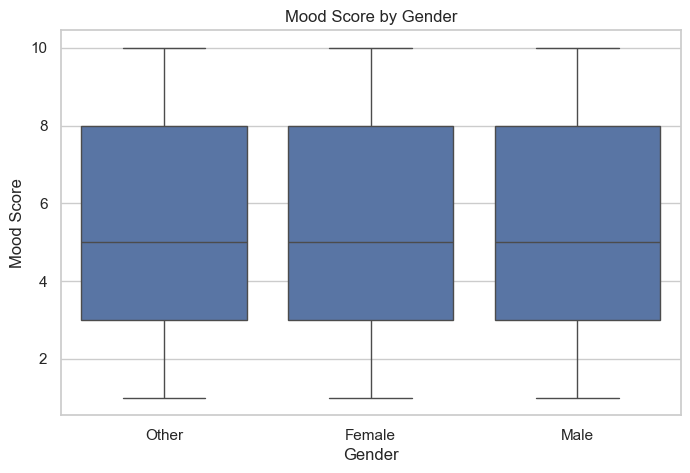

In [32]:
# Example: Mood Score by Gender
sns.boxplot(x='Gender', y='Mood Score', data=data)
plt.title('Mood Score by Gender')
plt.show()

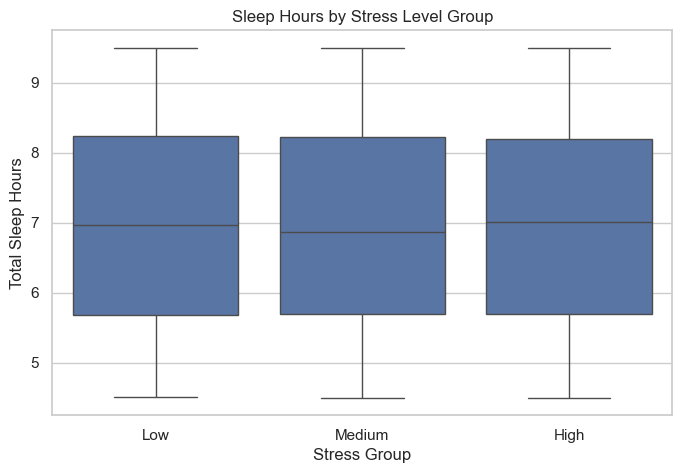

In [34]:
data['Stress Group'] = pd.cut(data['Stress Level'], bins=[0,3,6,10], labels=['Low','Medium','High'])
sns.boxplot(x='Stress Group', y='Total Sleep Hours', data=data)
plt.title('Sleep Hours by Stress Level Group')
plt.show()

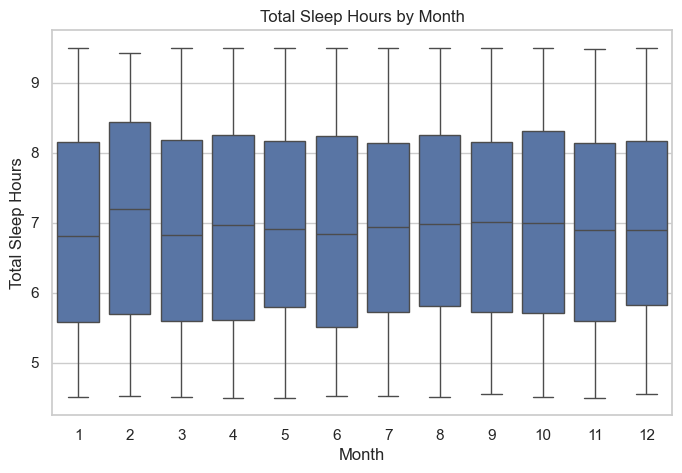

In [38]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

sns.boxplot(x='Month', y='Total Sleep Hours', data=data)
plt.title('Total Sleep Hours by Month')
plt.show()

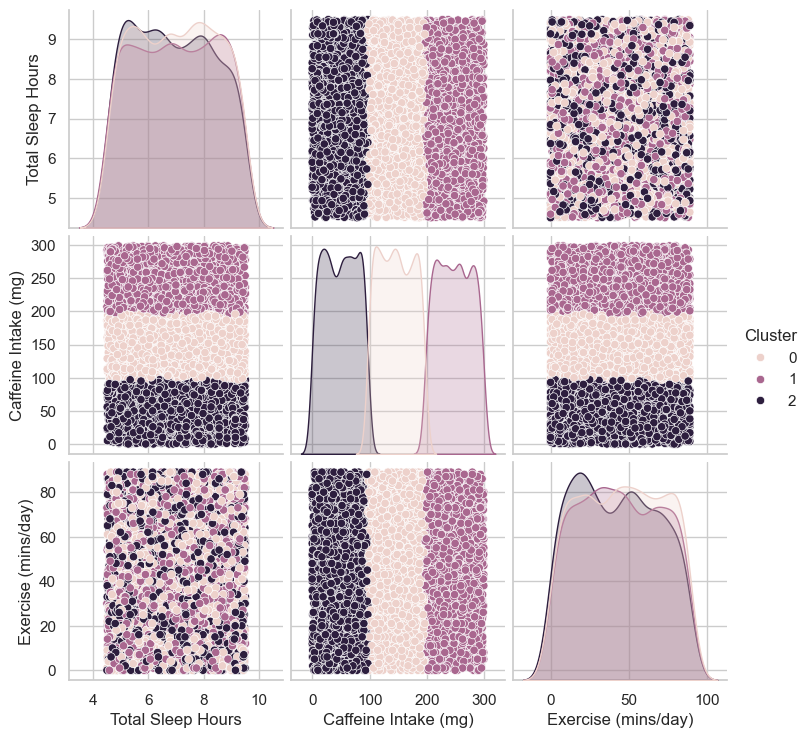

In [40]:
from sklearn.cluster import KMeans

X = data[['Total Sleep Hours', 'Caffeine Intake (mg)', 'Exercise (mins/day)']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
data['Cluster'] = kmeans.labels_

sns.pairplot(data, hue='Cluster', vars=['Total Sleep Hours', 'Caffeine Intake (mg)', 'Exercise (mins/day)'])
plt.show()

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# === 1️⃣ Select Features & Target ===
features = ['Total Sleep Hours', 'Caffeine Intake (mg)', 'Exercise (mins/day)', 
            'Screen Time Before Bed (mins)', 'Stress Level']
target = 'Productivity Score'

X = data[features]
y = data[target]

# === 2️⃣ Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 3️⃣ Train Models ===

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# === 4️⃣ Evaluate ===

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Metrics
def print_scores(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # manual square root for RMSE

    print(f"\n{model_name} Results:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", rmse)

print_scores(y_test, y_pred_lr, "Linear Regression")
print_scores(y_test, y_pred_rf, "Random Forest")

# === 5️⃣ Feature Importance (Random Forest) ===
importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
print("\nFeature Importances:\n", importance_df.sort_values(by='Importance', ascending=False))


Linear Regression Results:
R² Score: 0.0010482756923559933
MAE: 2.486343060979468
RMSE: 2.84192692831267

Random Forest Results:
R² Score: -0.06643857828993438
MAE: 2.5503899999999997
RMSE: 2.9363551386029587

Feature Importances:
                          Feature  Importance
0              Total Sleep Hours    0.240969
1           Caffeine Intake (mg)    0.236974
3  Screen Time Before Bed (mins)    0.219952
2            Exercise (mins/day)    0.199655
4                   Stress Level    0.102451


Both Linear Regression and Random Forest show very weak predictive power for Productivity Score. The low R² values and high MAE/RMSE indicate that the features (Sleep, Caffeine, Exercise, Screen Time, Stress) don't have a strong linear or non-linear relationship with the target variable.

Even though the Random Forest model finds certain features like Sleep and Caffeine Intake to be relatively important, the overall model performance doesn't improve significantly, suggesting that these features might not be sufficient to explain Productivity Score.

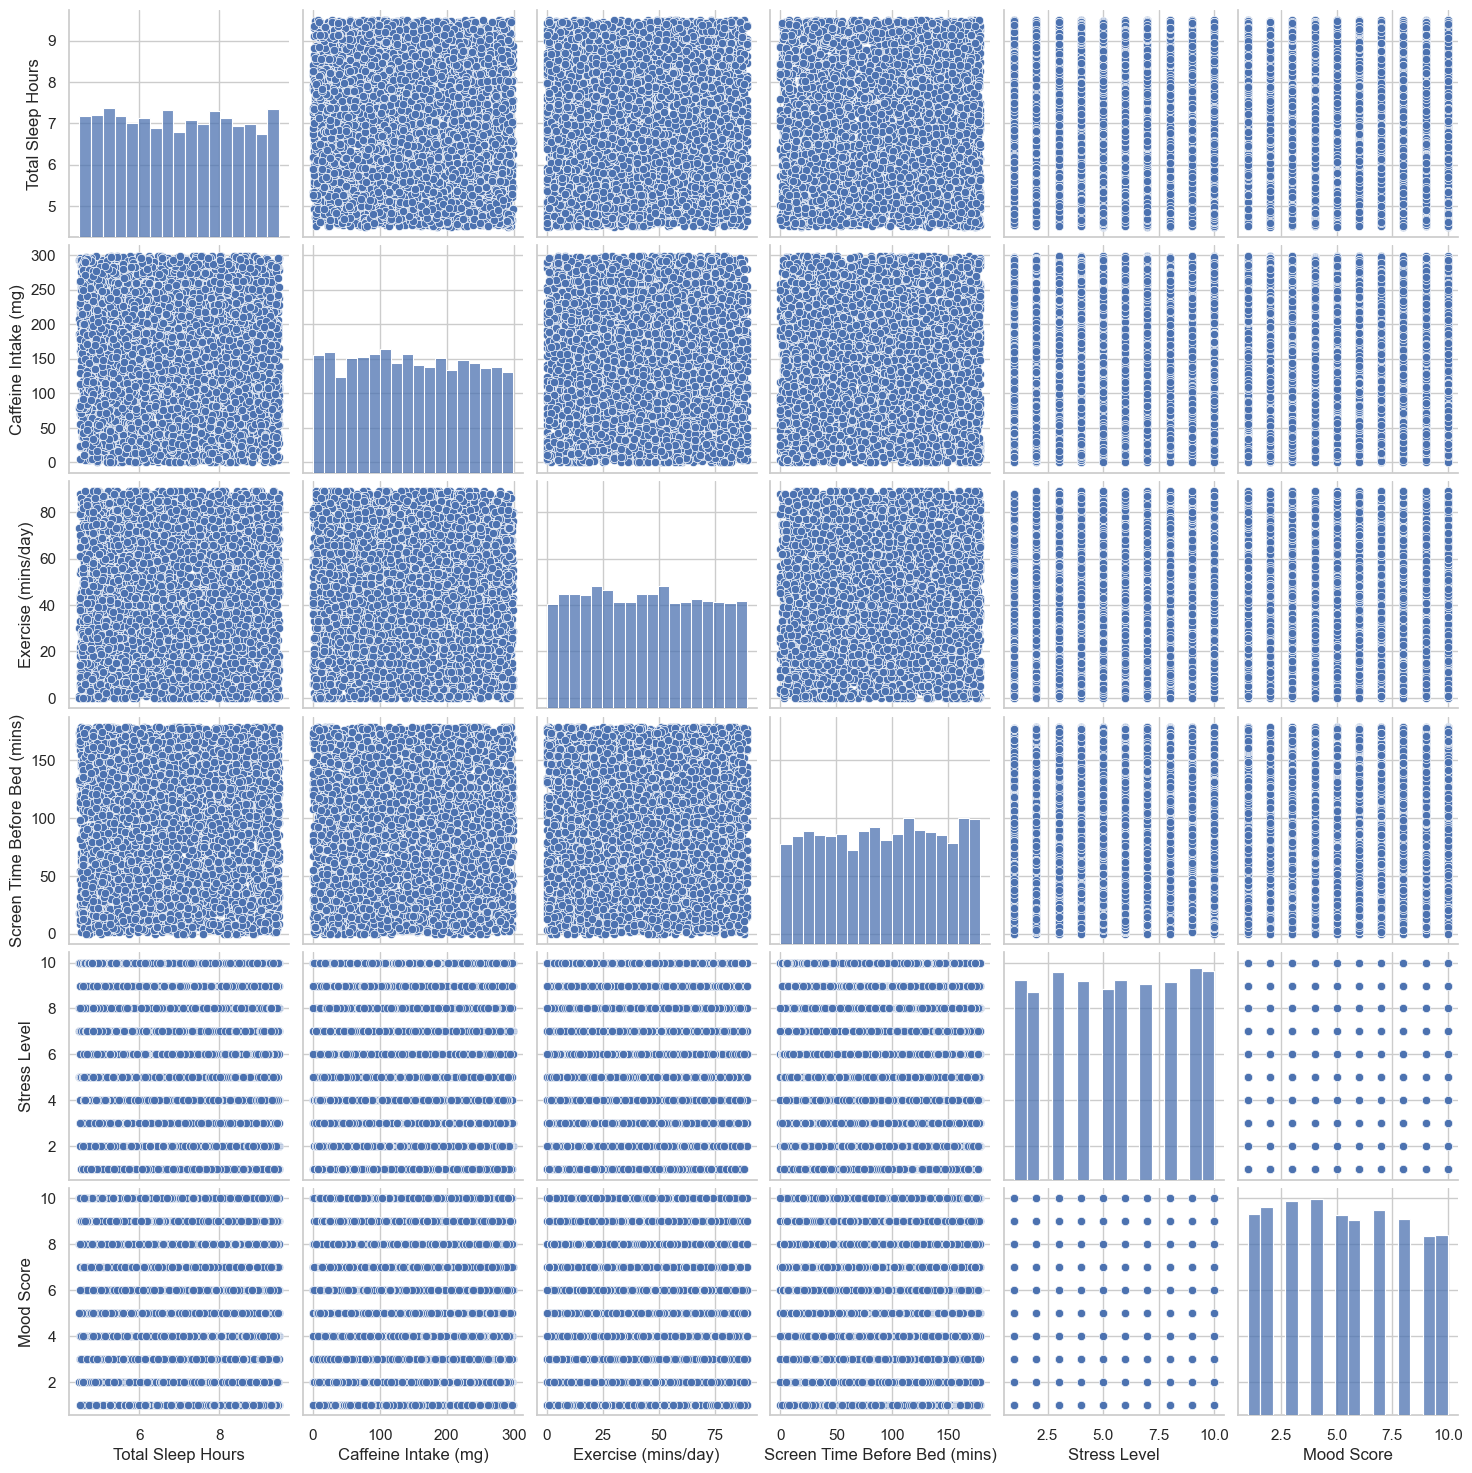

In [49]:
sns.pairplot(data[['Total Sleep Hours', 'Caffeine Intake (mg)', 'Exercise (mins/day)', 'Screen Time Before Bed (mins)', 'Stress Level', 'Mood Score']])
plt.show()

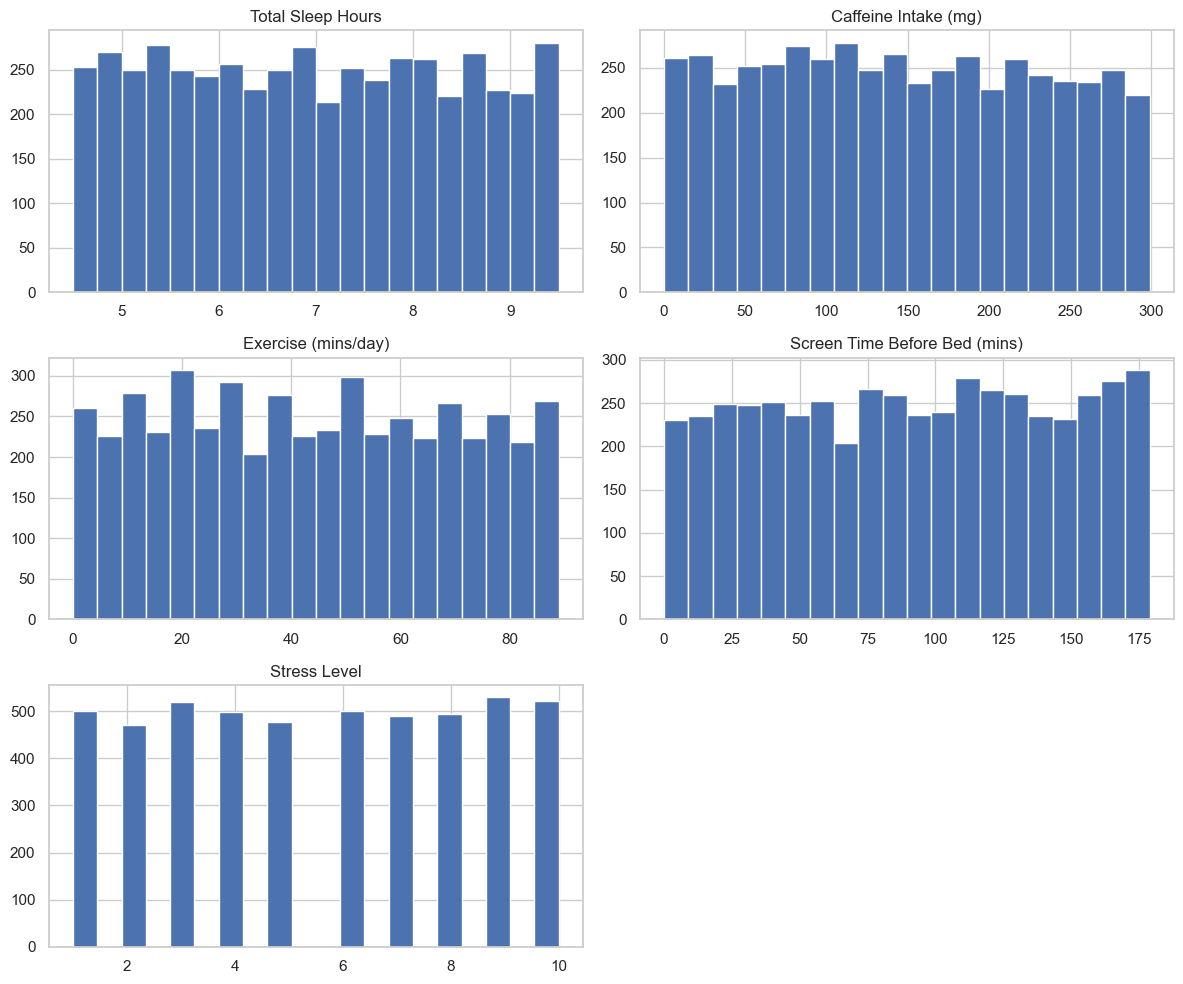

In [51]:
data[['Total Sleep Hours', 'Caffeine Intake (mg)', 'Exercise (mins/day)', 'Screen Time Before Bed (mins)', 'Stress Level']].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

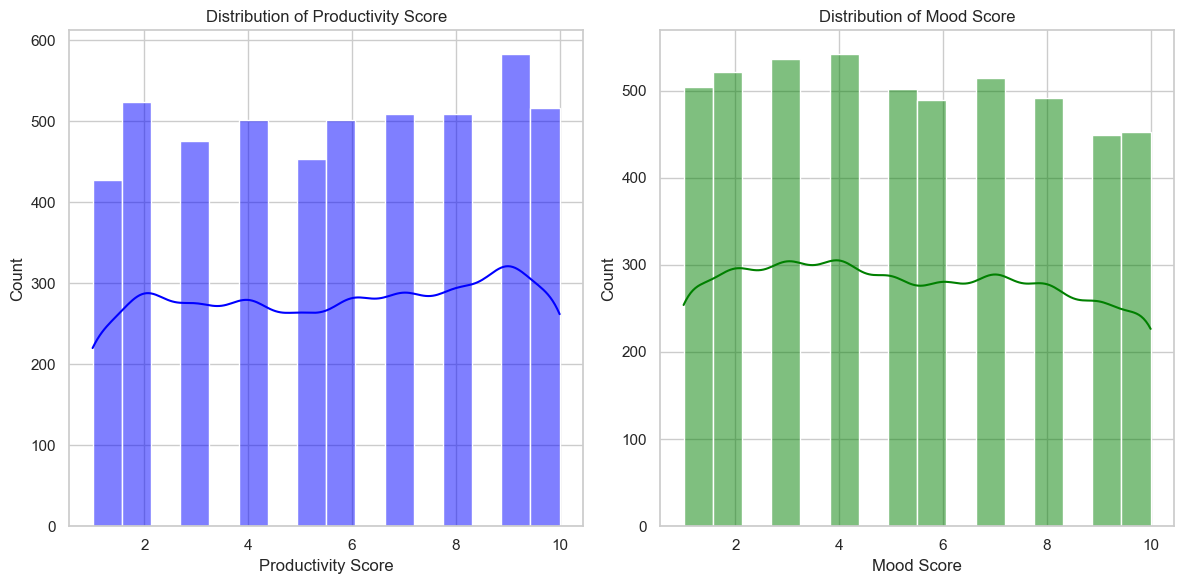

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Productivity Score'], kde=True, color='blue')
plt.title('Distribution of Productivity Score')

plt.subplot(1, 2, 2)
sns.histplot(data['Mood Score'], kde=True, color='green')
plt.title('Distribution of Mood Score')

plt.tight_layout()
plt.show()

In [63]:
# Step 1: Feature Engineering (Interaction Features)

# Create interaction features
data['Sleep_Exercise_Interaction'] = data['Total Sleep Hours'] * data['Exercise (mins/day)']
data['Caffeine_ScreenTime_Interaction'] = data['Caffeine Intake (mg)'] * data['Screen Time Before Bed (mins)']
data['Stress_Sleep_Interaction'] = data['Stress Level'] * data['Total Sleep Hours']
data['Sleep_Mood_Interaction'] = data['Total Sleep Hours'] * data['Mood Score']

# Display the updated DataFrame with new features
print(data[['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
            'Stress Level', 'Mood Score', 'Sleep_Exercise_Interaction', 'Caffeine_ScreenTime_Interaction', 
            'Stress_Sleep_Interaction', 'Sleep_Mood_Interaction']].head())

# Step 2: Prepare the Data for Modeling

# Separate the features (X) and the target variable (y)
X = data[['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 
          'Screen Time Before Bed (mins)', 'Stress Level', 'Mood Score', 
          'Sleep_Exercise_Interaction', 'Caffeine_ScreenTime_Interaction', 
          'Stress_Sleep_Interaction', 'Sleep_Mood_Interaction']]
y = data['Productivity Score']

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the models

# Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluate the Models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Print scores for Linear Regression and Random Forest
print_scores(y_test, y_pred_lr, "Linear Regression")
print_scores(y_test, y_pred_rf, "Random Forest")

# Step 7: Feature Importances (Random Forest)
import pandas as pd
import numpy as np

# Extract feature importances for Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort the feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature Importances (Random Forest):")
print(feature_importances)

   Total Sleep Hours  Exercise (mins/day)  Caffeine Intake (mg)  \
0               5.28                   86                    87   
1               5.41                   32                    21   
2               5.35                   17                    88   
3               7.55                   46                    34   
4               6.75                   61                   269   

   Screen Time Before Bed (mins)  Stress Level  Mood Score  \
0                            116             6           3   
1                             88             7           3   
2                             59            10           9   
3                             80             2           4   
4                             94             9           7   

   Sleep_Exercise_Interaction  Caffeine_ScreenTime_Interaction  \
0                      454.08                            10092   
1                      173.12                             1848   
2                       90

Sleep → Stress Level | R²: 1.666644334741285e-05
Sleep → Productivity Score | R²: 0.00035662876731679116
Noise Model R² (Stress): 0.0002171906557426606
Noise Model R² (Productivity): 3.947423638095415e-05
Stress Correlation (Original): -0.004
Stress Correlation (Noisy): -0.002
Productivity Correlation (Original): 0.019
Productivity Correlation (Noisy): 0.018


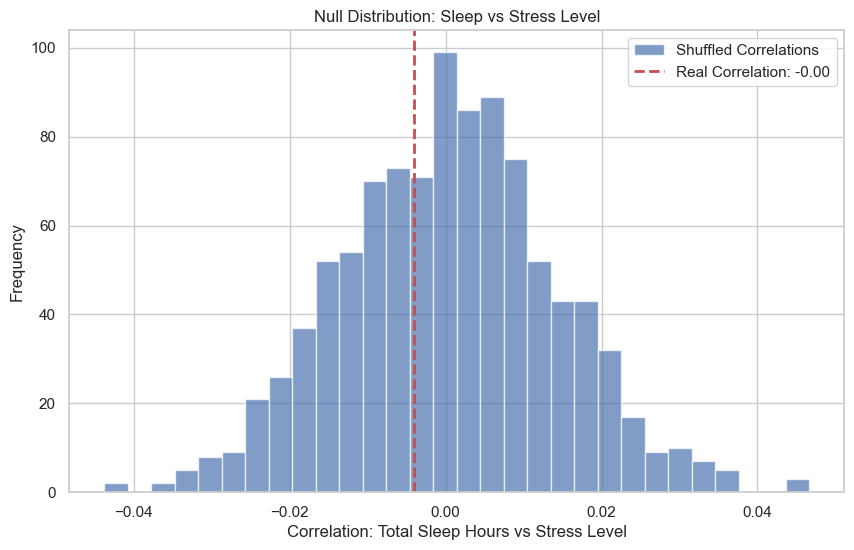

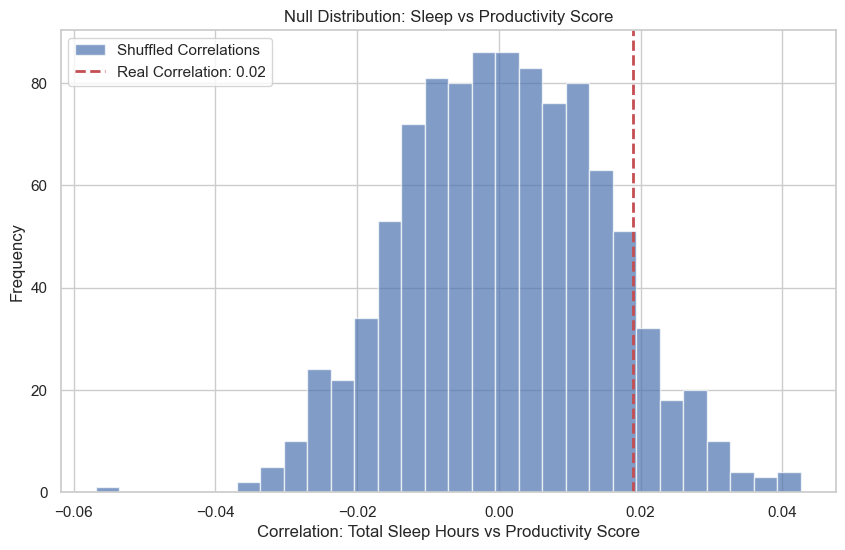

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your data
data = pd.read_csv('data/sleep_cycle_productivity.csv')

# =======================
# 1️⃣ Predictive Model Benchmark: Real vs. Noise
# =======================

# Real feature
X_sleep = data[['Total Sleep Hours']]
y_stress = data['Stress Level']
y_productivity = data['Productivity Score']

# Linear regression for Stress Level
model_stress = LinearRegression().fit(X_sleep, y_stress)
y_pred_stress = model_stress.predict(X_sleep)
print("Sleep → Stress Level | R²:", r2_score(y_stress, y_pred_stress))

# Linear regression for Productivity Score
model_productivity = LinearRegression().fit(X_sleep, y_productivity)
y_pred_productivity = model_productivity.predict(X_sleep)
print("Sleep → Productivity Score | R²:", r2_score(y_productivity, y_pred_productivity))

# Random Noise baseline
X_noise = pd.DataFrame({
    'Noise': np.random.normal(0, 1, len(data))
})

model_noise_stress = LinearRegression().fit(X_noise, y_stress)
model_noise_productivity = LinearRegression().fit(X_noise, y_productivity)

print("Noise Model R² (Stress):", r2_score(y_stress, model_noise_stress.predict(X_noise)))
print("Noise Model R² (Productivity):", r2_score(y_productivity, model_noise_productivity.predict(X_noise)))

# =======================
# 2️⃣ Add Controlled Noise for Robustness
# =======================

# Adding Gaussian noise to Total Sleep Hours
data['Sleep Hours Noisy'] = data['Total Sleep Hours'] + np.random.normal(0, 0.1, len(data))

# Correlations before and after noise
stress_corr_original = data['Total Sleep Hours'].corr(data['Stress Level'])
stress_corr_noisy = data['Sleep Hours Noisy'].corr(data['Stress Level'])

productivity_corr_original = data['Total Sleep Hours'].corr(data['Productivity Score'])
productivity_corr_noisy = data['Sleep Hours Noisy'].corr(data['Productivity Score'])

print(f"Stress Correlation (Original): {stress_corr_original:.3f}")
print(f"Stress Correlation (Noisy): {stress_corr_noisy:.3f}")
print(f"Productivity Correlation (Original): {productivity_corr_original:.3f}")
print(f"Productivity Correlation (Noisy): {productivity_corr_noisy:.3f}")

# =======================
# 3️⃣ Null Distribution via Shuffling
# =======================

def plot_null_distribution(feature, target, title):
    real_corr = data[feature].corr(data[target])
    shuffled_corrs = [
        data[feature].corr(data[target].sample(frac=1).reset_index(drop=True))
        for _ in range(1000)
    ]

    plt.figure(figsize=(10,6))
    plt.hist(shuffled_corrs, bins=30, alpha=0.7, label='Shuffled Correlations')
    plt.axvline(real_corr, color='r', linestyle='dashed', linewidth=2, label=f"Real Correlation: {real_corr:.2f}")
    plt.legend()
    plt.xlabel(f'Correlation: {feature} vs {target}')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot for Sleep vs Stress
plot_null_distribution('Total Sleep Hours', 'Stress Level', 'Null Distribution: Sleep vs Stress Level')

# Plot for Sleep vs Productivity
plot_null_distribution('Total Sleep Hours', 'Productivity Score', 'Null Distribution: Sleep vs Productivity Score')

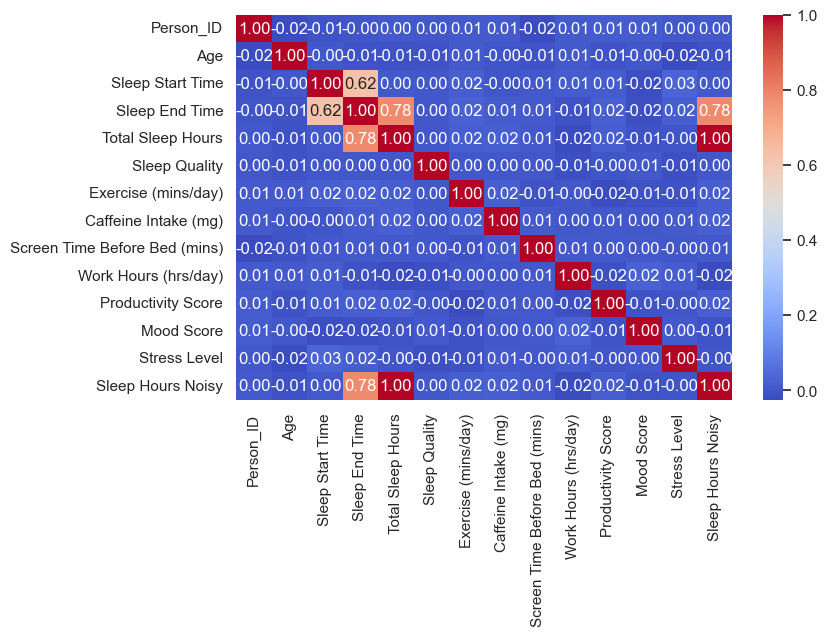

In [67]:
data_numeric = data.select_dtypes(include = 'number')
corr = data_numeric.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()